## ASAP preprocessing

This will take around 20 minutes

In [ ]:
!asap gen_desc --no-periodic -f atoms_qm9.xyz soap -u minimal

In [ ]:
!asap map -f ASAP-desc.xyz -dm [SOAP-n4-l3-c2.4-g0.3] -c atomization_energy_eV skpca -k linear --no-scale --n_sparse 1000

## Plotting 

Reading the extended xyz file might also take a few minutes

In [59]:
from ase.io import read
import matplotlib.pyplot as plt
import matplotlib as mpl 
import numpy as np
mpl.rcParams.update({'font.family':'serif'})

In [4]:
atoms_qm9=read('ASAP-lowD-map.xyz',index=':')

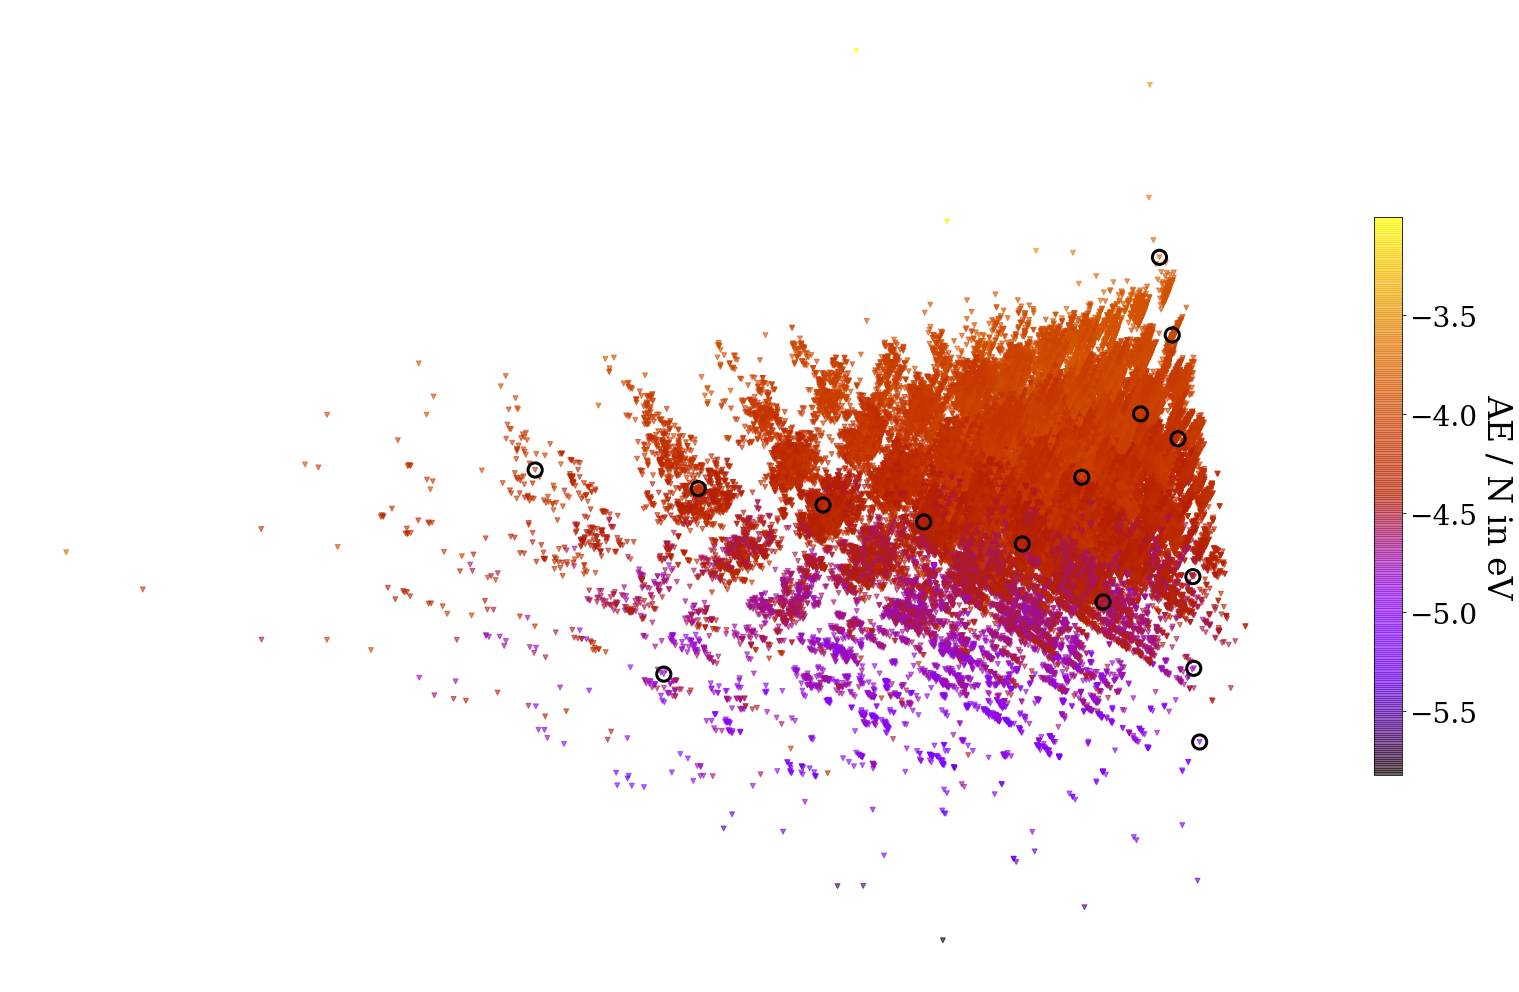

In [1057]:
fig,ax=plt.subplots(figsize=(25,18))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])
res=np.array([at.info['skpca-d-10'] for at in atoms_qm9])
plt.scatter(res[:,0], res[:,1], s=25, 
            alpha=0.6, c=[at.info['atomization_energy_eV']/len(at) for at in atoms_qm9],  #dft_energy_no_zpe
            marker='v', label='QM9', 
            cmap=plt.cm.get_cmap('gnuplot'))

cbar = plt.colorbar(fraction=0.02)
cbar.set_label('AE / N in eV', fontsize=33, rotation=270, labelpad=35)
cbar.ax.tick_params(labelsize=28)
#plt.clim(np.min([at.info['atomization_energy_eV']/len(at) for at in atoms_qm9]),-3.3)

#31385
ids=[20,11759,33265,52463,39592,132406,21141,128758,3865,27292, 24017, 4192, 1865,31385, 59754]
for i in ids:
    plt.scatter(res[i,0], res[i,1], s=200, facecolors='none', edgecolors='black',linewidth=3)
    #plt.text(res[i,0], res[i,1],i, fontsize=20)

plt.show()

at_sel=[atoms_qm9[idx] for idx in ids]
write('atoms_selected.xyz',at_sel)

[['C', 'H'], ['C', 'H', 'N'], ['C', 'H', 'O'], ['C', 'H', 'N', 'O'], ['C', 'F', 'H', 'N'], ['C', 'F', 'H', 'O'], ['C', 'F', 'H', 'N', 'O']]


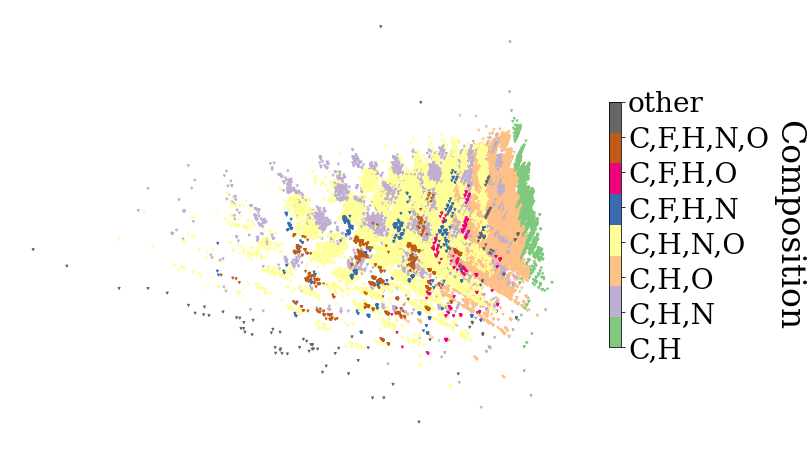

In [47]:
import itertools

# Get possible combinations
set_combinations=[]
atom_symbols = ['H','C','N','O','F']
for L in range(0, len(atom_symbols)+1):
    for subset in itertools.combinations(atom_symbols, L):
        set_combinations.append(list(sorted(subset)))

# Get compositions for molecules
numocc=[0]*len(set_combinations)
for i, at in enumerate(atoms_qm9):
    syms=list(sorted(set(at.get_chemical_symbols())))
    numocc[set_combinations.index(syms)]+=1

# Get compositions with more than 100 members
set_combinations_new=[]
for i,comb in enumerate(set_combinations):
    if numocc[i]>100: set_combinations_new.append(comb)
print(set_combinations_new)
set_combinations=set_combinations_new+['other']

categories=[]
for i, at in enumerate(atoms_qm9):
    syms=list(sorted(set(at.get_chemical_symbols())))
    if syms in set_combinations:
        categories.append(set_combinations.index(syms))
    else: 
        categories.append(len(set_combinations)-1)
    
fig,ax=plt.subplots(figsize=(11,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(axis='both', which='both',
                bottom=False, top=False, right=False, left=False,
                labelbottom=False, labelleft=False)
plt.xticks([])
plt.yticks([])
res=np.array([at.info['skpca-d-10'] for at in atoms_qm9])
plt.scatter(res[:,0], res[:,1], s=4, 
            alpha=1, c=categories, marker='v', label='QM9', 
            cmap=plt.cm.get_cmap('Accent',len(set_combinations)))
cbar = plt.colorbar(fraction=0.02, pad=0.05)
cbar.set_label('Composition', fontsize=33, rotation=270, labelpad=35)
cbar.set_ticks(list(range(len(set_combinations))))
cbar.ax.set_yticklabels([','.join(x) if 'C' in x else 'other' for x in set_combinations], fontsize=28)
plt.show()

20


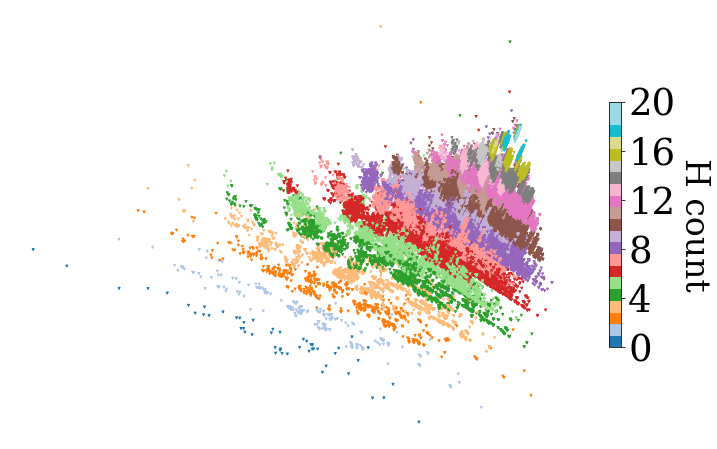

9


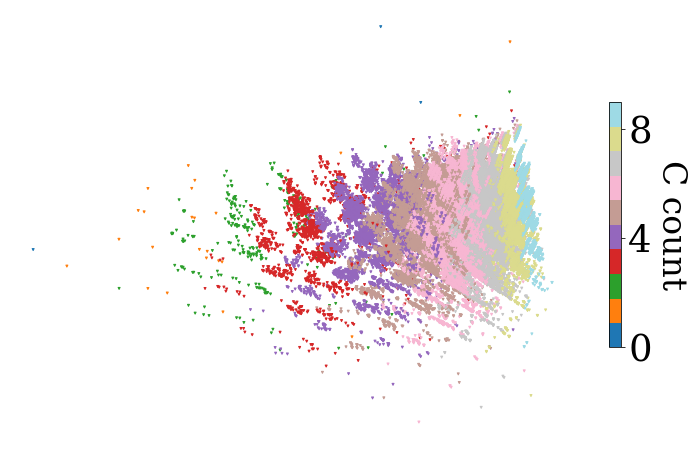

7


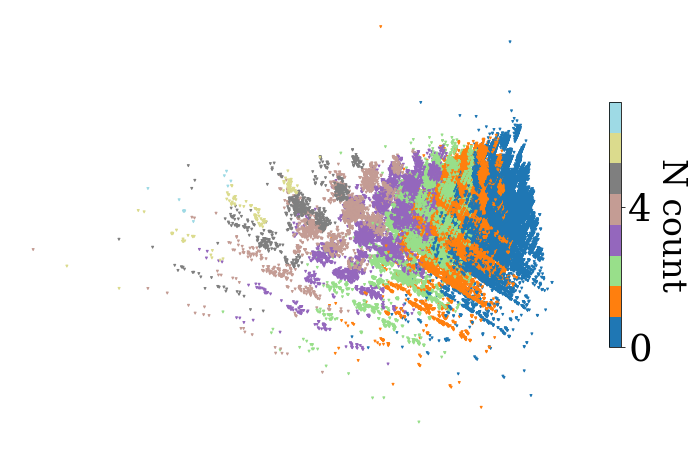

5


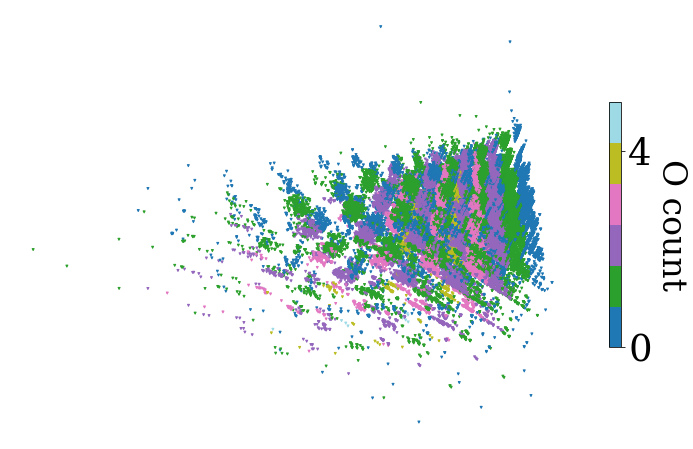

6


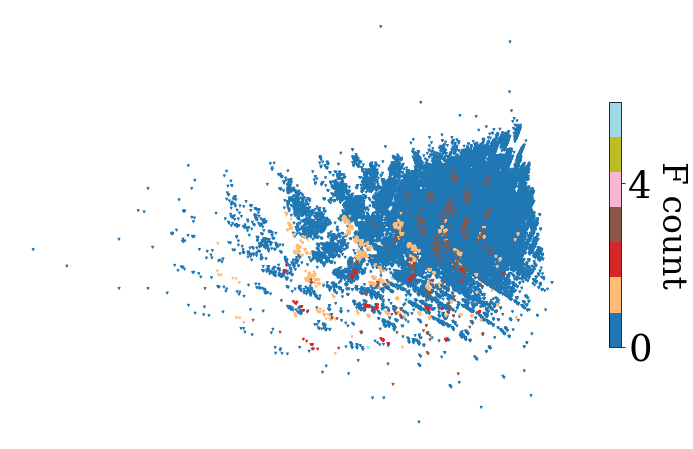

In [1062]:
# We have omitted F from the count, as it occurs seldomly
species=['H','C','N','O','F']
for s in species:
    at_counts=[at.get_chemical_symbols().count(s) for at in atoms_qm9]
    print(max(at_counts))
    fig,ax=plt.subplots(figsize=(11,8))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.scatter(res[:,0], res[:,1], s=4, 
                alpha=1, c=at_counts, 
                marker='v', label='QM9', cmap=plt.cm.get_cmap('tab20', max(at_counts)+1))
    cbar = plt.colorbar(fraction=0.02, pad=0.05)
    cbar.set_label('{} count'.format(s), fontsize=33, rotation=270, labelpad=35)
    cbar.set_ticks([x*4 for x in range(20)])
    cbar.ax.set_yticklabels([str(x*4) for x in range(20)],fontsize=37)
    plt.show()

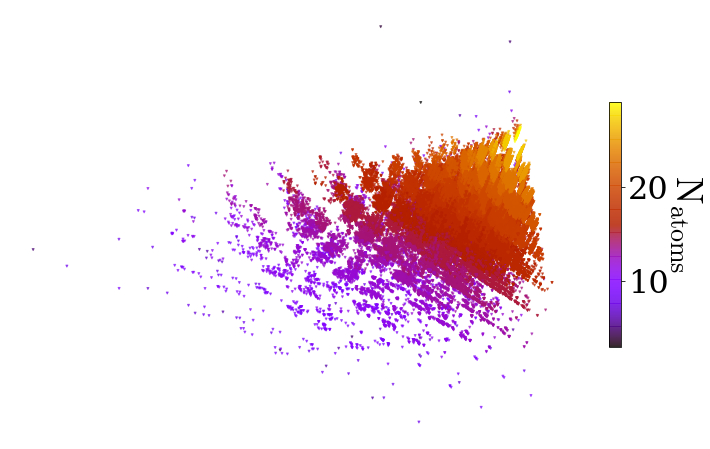

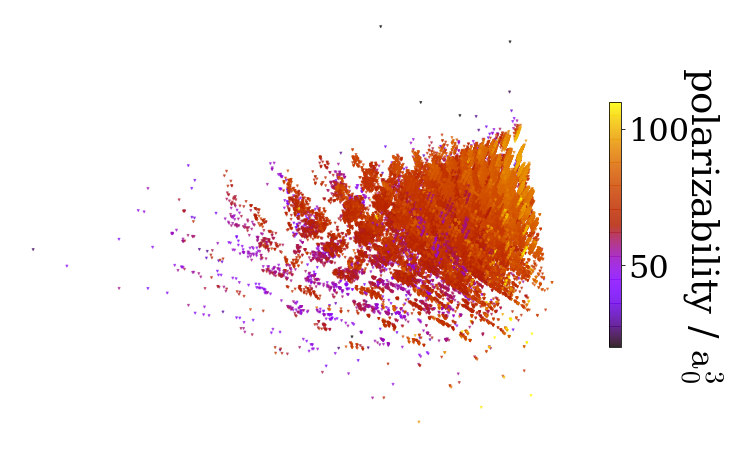

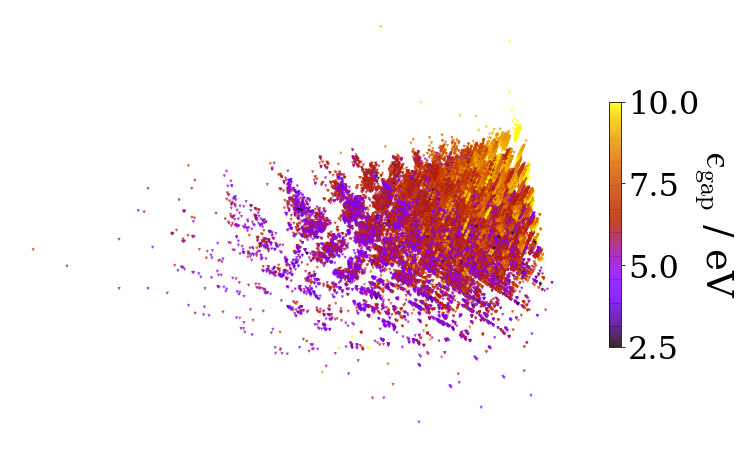

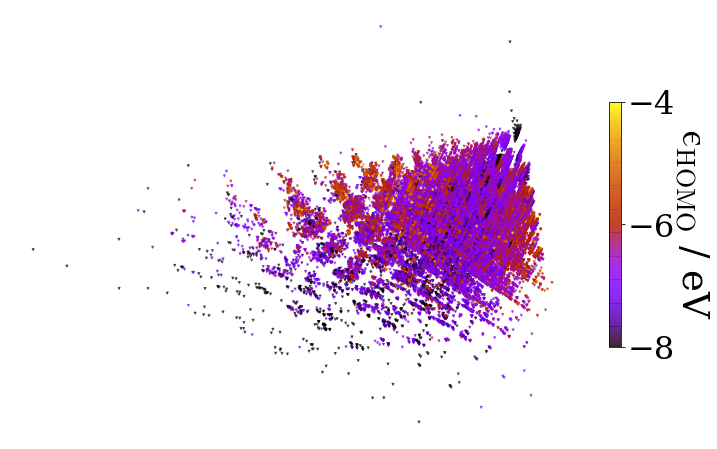

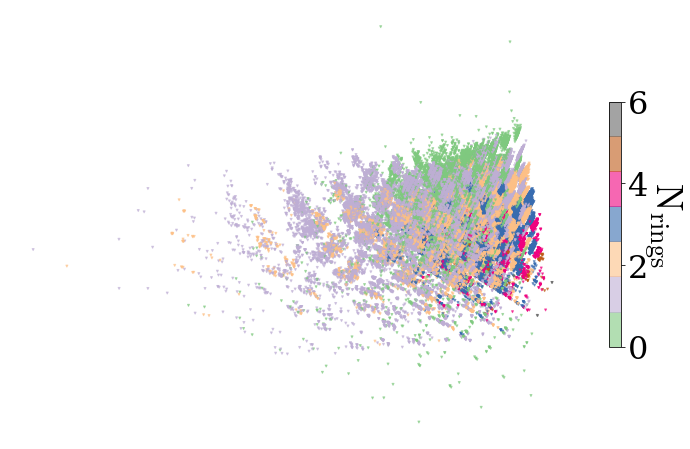

In [1059]:
fig,ax=plt.subplots(figsize=(11,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])
res=np.array([at.info['skpca-d-10'] for at in atoms_qm9])
plt.scatter(res[:,0], res[:,1], s=4, 
            alpha=0.6, c=[len(at) for at in atoms_qm9],  #dft_energy_no_zpe
            marker='v', label='QM9', 
            cmap=plt.cm.get_cmap('gnuplot'))
cbar = plt.colorbar(fraction=0.02, pad=0.05)
cbar.set_label('$\mathrm{N_{atoms}}$', fontsize=37, rotation=270, labelpad=35)
cbar.ax.tick_params(labelsize=32)
plt.show()


plt.rcParams["mathtext.fontset"] = "cm"

fig,ax=plt.subplots(figsize=(11,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])
res=np.array([at.info['skpca-d-10'] for at in atoms_qm9])
plt.scatter(res[:,0], res[:,1], s=4, 
            alpha=0.6, c=[at.info['polarizability_a0^3'] for at in atoms_qm9],  #dft_energy_no_zpe
            marker='v', label='QM9', 
            cmap=plt.cm.get_cmap('gnuplot'))
cbar = plt.colorbar(fraction=0.02, pad=0.05)
cbar.set_label('polarizability / $\mathrm{a_0^3}$', fontsize=37, rotation=270, labelpad=35)
cbar.ax.tick_params(labelsize=32)
plt.clim(20,110)
plt.show()

fig,ax=plt.subplots(figsize=(11,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])
res=np.array([at.info['skpca-d-10'] for at in atoms_qm9])
plt.scatter(res[:,0], res[:,1], s=4, 
            alpha=0.6, c=[at.info['EGap_eV'] for at in atoms_qm9],  #dft_energy_no_zpe
            marker='v', label='QM9', 
            cmap=plt.cm.get_cmap('gnuplot'))
cbar = plt.colorbar(fraction=0.02, pad=0.05)
cbar.set_label('$\mathrm{ϵ_{gap}}$ / eV', fontsize=37, rotation=270, labelpad=35)
cbar.ax.tick_params(labelsize=32)
plt.clim(2.5,10)
plt.show()


fig,ax=plt.subplots(figsize=(11,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])
res=np.array([at.info['skpca-d-10'] for at in atoms_qm9])
plt.scatter(res[:,0], res[:,1], s=4, 
            alpha=0.6, c=[at.info['EHOMO_eV'] for at in atoms_qm9],  #dft_energy_no_zpe
            marker='v', label='QM9', 
            cmap=plt.cm.get_cmap('gnuplot'))
cbar = plt.colorbar(fraction=0.02, pad=0.05)
cbar.set_label('$\mathrm{ϵ_{HOMO}}$ / eV', fontsize=37, rotation=270, labelpad=35)
cbar.ax.tick_params(labelsize=32)
plt.clim(-8,-4)
plt.show()

n_rings=[at.info['n_rings'] for at in atoms_qm9]
fig,ax=plt.subplots(figsize=(11,8))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks([])
plt.yticks([])
res=np.array([at.info['skpca-d-10'] for at in atoms_qm9])
plt.scatter(res[:,0], res[:,1], s=4, 
            alpha=0.6, c=n_rings,  #dft_energy_no_zpe
            marker='v', label='QM9', 
            cmap=plt.cm.get_cmap('Accent',len(set(n_rings))))
cbar = plt.colorbar(fraction=0.02, pad=0.05)
cbar.set_label('$\mathrm{N_{rings}}$', fontsize=37, rotation=270, labelpad=35)
cbar.ax.tick_params(labelsize=32)
plt.show()